In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.stats.diagnostic import acorr_ljungbox
from statsmodels.tsa.stattools import adfuller, acf, pacf
import seaborn as sns

In [3]:
train_residuals_df = pd.read_csv("data/train_residuals_df.csv", parse_dates=["Date"], index_col="Date")
residuals = train_residuals_df["Residuals"]

In [13]:
print("number of rows: ", len(residuals))

number of rows:  731


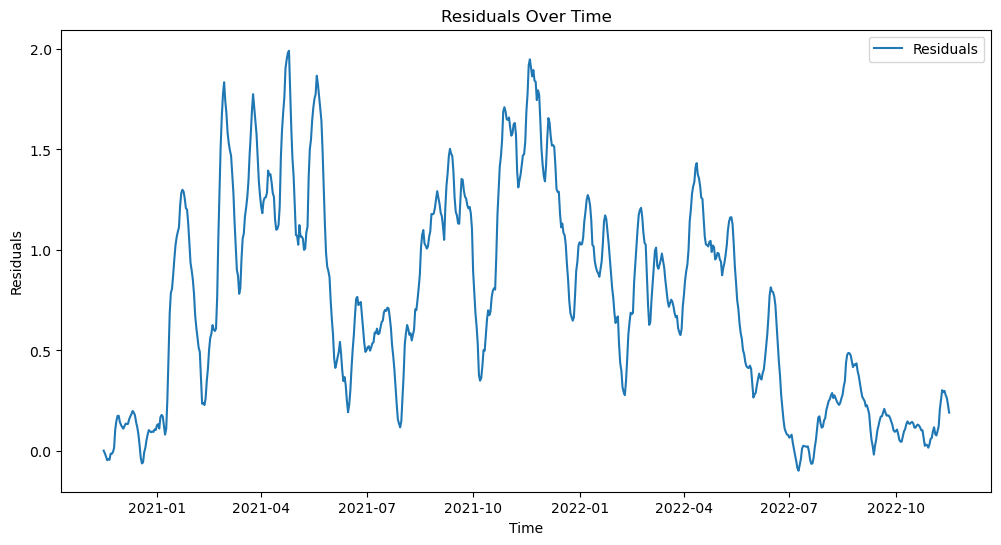

In [5]:
# 1. Plot the residuals
plt.figure(figsize=(12, 6))
plt.plot(residuals, label='Residuals')
plt.title('Residuals Over Time')
plt.xlabel('Time')
plt.ylabel('Residuals')
plt.legend()
plt.show()

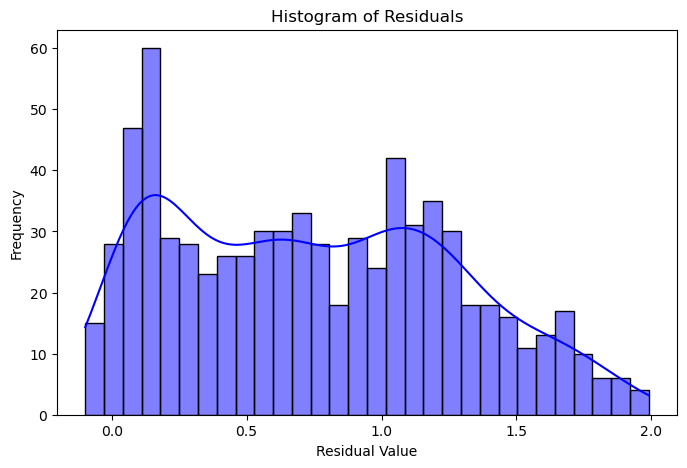

In [6]:
# 2. Histogram of residuals
plt.figure(figsize=(8, 5))
sns.histplot(residuals, kde=True, bins=30, color='blue')
plt.title('Histogram of Residuals')
plt.xlabel('Residual Value')
plt.ylabel('Frequency')
plt.show()

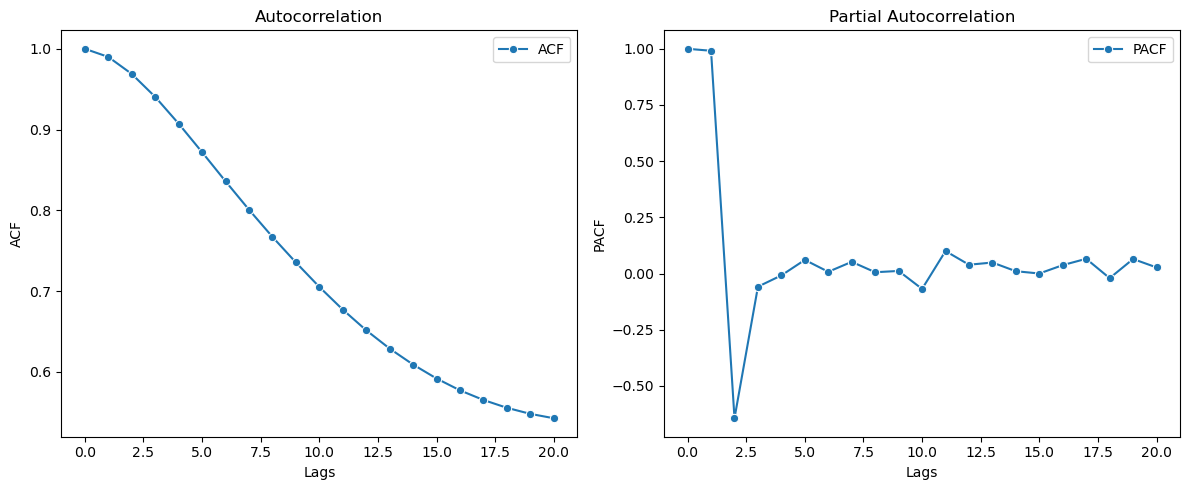

In [14]:
# 3. Autocorrelation and Partial Autocorrelation Plots
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
sns.lineplot(acf(residuals, nlags=20), marker='o', ax=ax[0], label="ACF")
ax[0].set_title('Autocorrelation')
ax[0].set_xlabel('Lags')
ax[0].set_ylabel('ACF')

sns.lineplot(pacf(residuals, nlags=20), marker='o', ax=ax[1], label="PACF")
ax[1].set_title('Partial Autocorrelation')
ax[1].set_xlabel('Lags')
ax[1].set_ylabel('PACF')

plt.tight_layout()
plt.show()

In [ ]:
# 4. Stationarity Test (ADF Test)
adf_test = adfuller(residuals)
print(f"ADF Statistic: {adf_test[0]}")
print(f"p-value: {adf_test[1]}")
if adf_test[1] <= 0.05:
    print("Residuals are stationary (p-value <= 0.05).")
else:
    print("Residuals are non-stationary (p-value > 0.05).")

ADF Statistic: -4.165096511191748
p-value: 0.0007545045734208465
Residuals are stationary (p-value <= 0.05).


In [10]:
# 5. Ljung-Box Test (Checks for autocorrelation)
ljung_box_result = acorr_ljungbox(residuals, lags=[10], return_df=True)
print("\nLjung-Box Test Results:")
print(ljung_box_result)


Ljung-Box Test Results:
        lb_stat  lb_pvalue
10  5425.878292        0.0


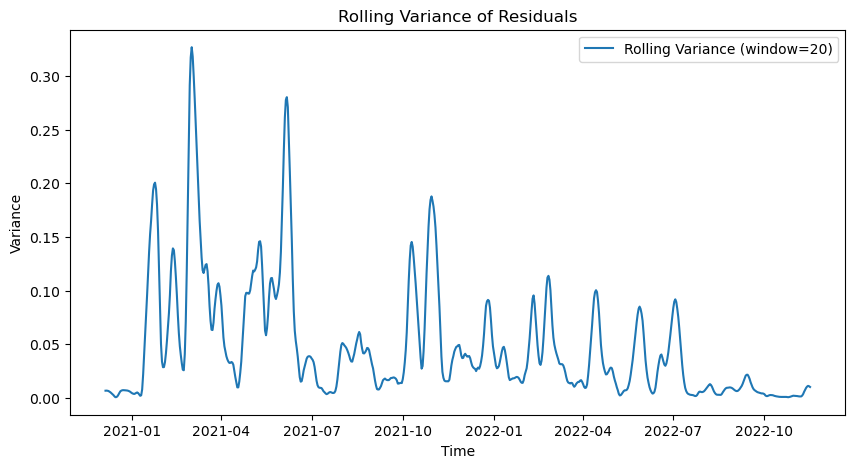

In [11]:
# 6. Variance Over Time
rolling_variance = pd.Series(residuals).rolling(window=20).var()
plt.figure(figsize=(10, 5))
plt.plot(rolling_variance, label="Rolling Variance (window=20)")
plt.title("Rolling Variance of Residuals")
plt.xlabel("Time")
plt.ylabel("Variance")
plt.legend()
plt.show()

In [12]:
# 7. Check for Outliers
outliers = residuals[np.abs(residuals - np.mean(residuals)) > 3 * np.std(residuals)]
print(f"Number of outliers (beyond 3 std deviations): {len(outliers)}")

Number of outliers (beyond 3 std deviations): 0
